# Study cases from Robot dance paper

In [1]:
import os
import pandas as pd
import numpy as np
import datetime

import run_robot
import prepare_data
from importlib import reload
reload(prepare_data)
reload(run_robot)

<module 'run_robot' from '/home/pjssilva/documentos/pesquisa/robot_dance/code/run_robot.py'>

In [2]:
%%capture
# Define the basic data for the case studies

# Compute initial values for first run and read the cities and other initial data
basic_prm = prepare_data.save_basic_parameters()
cities_data = prepare_data.compute_initial_condition_evolve_and_save(basic_prm, "SP", ["Araçatuba", "São José Do Rio Preto"], 500000, 1)
M = prepare_data.convert_mobility_matrix_and_save(cities_data, max_neighbors=3)

# Create a target matrix (max infected level)
ncities, ndays = len(cities_data.index), int(basic_prm["ndays"])
target = 0.007*np.ones((ncities, ndays))
target[-1, :] = 0.015
target = prepare_data.save_target(cities_data, target)

# Use a forcedif that releases the cities in the end
force_dif = np.ones((ncities, ndays))
force_dif[:-1, 288:] = 0.0
force_dif[-1, 149:] = 0.0

## Case 1: 14 day window, official data

In [3]:
basic_prm["hammer_duration"] = 2*14
run_robot.prepare_optimization(basic_prm, cities_data, M, target, force_dif)

CPU times: user 4min 23s, sys: 3min, total: 7min 24s
Wall time: 41.2 s


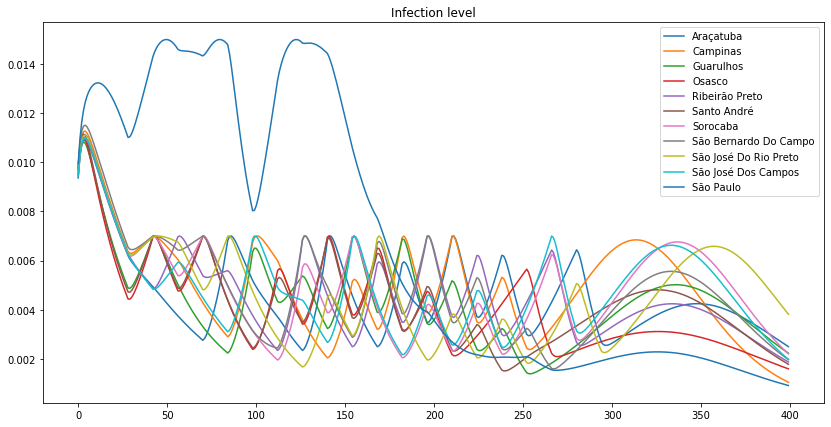

In [4]:
%%time
run_robot.optimize_and_show_results("results/window_14_i.png", "results/window_14_rt.png",
                                    "results/window_14.csv", cities_data.index)

## Case 2: 14 day window, correct sub-notification by 6x

In [6]:
cities_data = prepare_data.compute_initial_condition_evolve_and_save(basic_prm, "SP", ["Araçatuba", "São José Do Rio Preto"], 500000, 6)

1/11 Araçatuba
2/11 Campinas
3/11 Guarulhos
4/11 Osasco
5/11 Ribeirão Preto
6/11 Santo André
7/11 Sorocaba
8/11 São Bernardo Do Campo
9/11 São José Do Rio Preto
10/11 São José Dos Campos
11/11 São Paulo
Simulating Araçatuba until 2020-06-18
Simulating Campinas until 2020-06-18
Simulating Guarulhos until 2020-06-18
Simulating Osasco until 2020-06-18
Simulating Ribeirão Preto until 2020-06-18
Simulating Santo André until 2020-06-18
Simulating Sorocaba until 2020-06-18
Simulating São Bernardo Do Campo until 2020-06-18
Simulating São José Do Rio Preto until 2020-06-18
Simulating São José Dos Campos until 2020-06-18
Simulating São Paulo until 2020-06-18


In [7]:
basic_prm["hammer_duration"] = 3*14
run_robot.prepare_optimization(basic_prm, cities_data, M, target, force_dif)

CPU times: user 4min 17s, sys: 3min 3s, total: 7min 20s
Wall time: 39.8 s


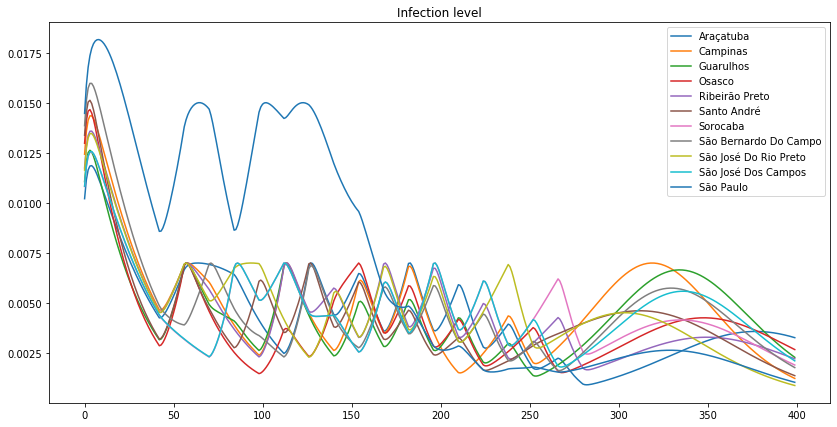

In [8]:
%%time
run_robot.optimize_and_show_results("results/window_14_i_corrected_6x.png", "results/window_14_rt_corrected_6x.png",
                                    "results/window_14_corrected_6x.csv", cities_data.index)

## Case 3: 14 day window, use São Paulo's health structure for the interior in the end, official data

In [9]:
# Data to simulate the situtation with a correction of 12x
cities_data = prepare_data.compute_initial_condition_evolve_and_save(basic_prm, "SP", ["Araçatuba", "São José Do Rio Preto"], 500000, 1)
# There was a bug in the estimation of the initial conditions for SEIR, there is no need for a hammer phase anymore.
# basic_prm["hammer_duration"] = 14

# Simulate São Paulo giving UTI places to the interior.
start_date = datetime.date(2020, 4, 23)
change_date = datetime.date(2020, 8, 20)
change_index = (change_date - start_date).days
target.iloc[:-1, change_index:] *= 2.0
target.iloc[-1, change_index:] /= 2.0

1/11 Araçatuba
2/11 Campinas
3/11 Guarulhos
4/11 Osasco
5/11 Ribeirão Preto
6/11 Santo André
7/11 Sorocaba
8/11 São Bernardo Do Campo
9/11 São José Do Rio Preto
10/11 São José Dos Campos
11/11 São Paulo
Simulating Araçatuba until 2020-06-18
Simulating Campinas until 2020-06-18
Simulating Guarulhos until 2020-06-18
Simulating Osasco until 2020-06-18
Simulating Ribeirão Preto until 2020-06-18
Simulating Santo André until 2020-06-18
Simulating Sorocaba until 2020-06-18
Simulating São Bernardo Do Campo until 2020-06-18
Simulating São José Do Rio Preto until 2020-06-18
Simulating São José Dos Campos until 2020-06-18
Simulating São Paulo until 2020-06-18


In [10]:
basic_prm["hammer_duration"] = 2*14
run_robot.prepare_optimization(basic_prm, cities_data, M, target, force_dif)

CPU times: user 4min 44s, sys: 3min 15s, total: 8min
Wall time: 42.8 s


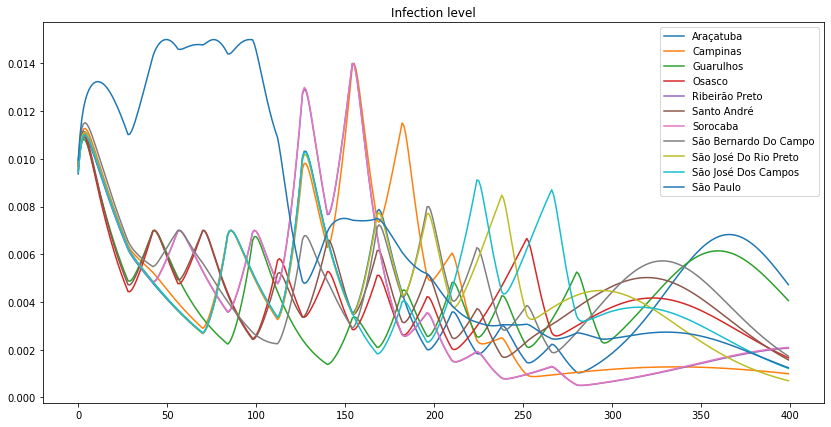

In [11]:
%%time
run_robot.optimize_and_show_results("results/window_14_extra_capacity_i.png", "results/window_14_extra_capacity_rt.png",
                                    "results/window_14_extra_capacity.csv", cities_data.index)

## Case 4: 14 day window, use São Paulo's health structure for the interior in the end, correct sub-notification by 6x

In [12]:
basic_prm["hammer_duration"] = 3*14
cities_data = prepare_data.compute_initial_condition_evolve_and_save(basic_prm, "SP", ["Araçatuba", "São José Do Rio Preto"], 500000, 6)

1/11 Araçatuba
2/11 Campinas
3/11 Guarulhos
4/11 Osasco
5/11 Ribeirão Preto
6/11 Santo André
7/11 Sorocaba
8/11 São Bernardo Do Campo
9/11 São José Do Rio Preto
10/11 São José Dos Campos
11/11 São Paulo
Simulating Araçatuba until 2020-06-18
Simulating Campinas until 2020-06-18
Simulating Guarulhos until 2020-06-18
Simulating Osasco until 2020-06-18
Simulating Ribeirão Preto until 2020-06-18
Simulating Santo André until 2020-06-18
Simulating Sorocaba until 2020-06-18
Simulating São Bernardo Do Campo until 2020-06-18
Simulating São José Do Rio Preto until 2020-06-18
Simulating São José Dos Campos until 2020-06-18
Simulating São Paulo until 2020-06-18


In [13]:
%%time
run_robot.prepare_optimization(basic_prm, cities_data, M, target, force_dif)

CPU times: user 1.45 s, sys: 8.57 ms, total: 1.46 s
Wall time: 1.46 s


CPU times: user 4min 8s, sys: 2min 51s, total: 6min 59s
Wall time: 37.4 s


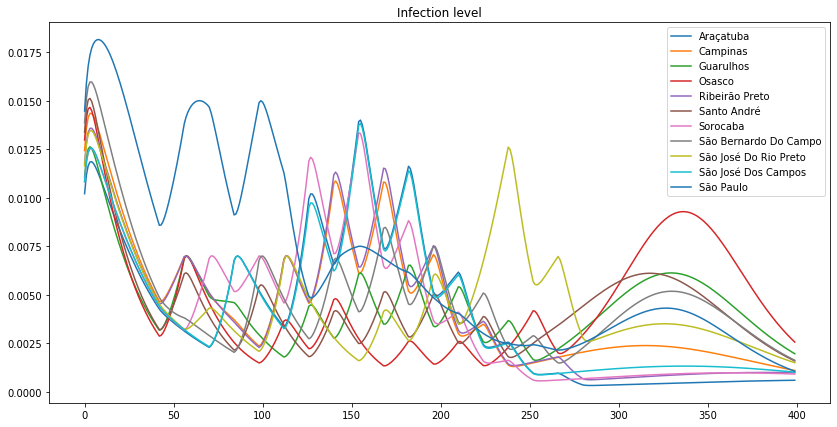

In [14]:
%%time
run_robot.optimize_and_show_results("results/window_14_i_corrected_6x.png", "results/window_14_rt_corrected_6x.png",
                                    "results/window_14_corrected_6x.csv", cities_data.index)